In [1]:
import pandas as pd
import time
import numpy as np
from yahoofinancials import YahooFinancials

In [2]:
start = '2003-12-1'
end = '2020-1-1'
tikcet = 'USDRUB=X'

In [3]:
def get_price_data(start, end, ticker='USDRUB=X'):
    """
    Gets USDRUB price data
    :param start: starting date for USDRUB price
    :type start : string of date "Y-M-D"
    :param end: end date for USDRUB price
    :type end: string of date "Y-M-D"
    :ticker: ticker for price, default="USDRUB=X"
    :type ticker: string 'USDRUB=X', 'tsla', etc
    :return: Pandas DataFrame
    """
    
    i = 1
    
    try:
        ticker = YahooFinancials(ticker)
        data = ticker.get_historical_price_data(start_date=start, end_date=end, time_interval='daily')
        
        
    except ValueError:
        print('Value error, trying again')
        i += 1
        if i < 5:
            time.sleep(10)
            get_price_data(start, end, ticker)
        else:
            print("Tried 5 times, Yahoo error. Trying after 2 minutes")
            time.sleep(120)
            get_price_data(start, end, ticker)
            
            
    data = pd.DataFrame(data['USDRUB=X']['prices']) # extract price which we need
    data = data.set_index('formatted_date',drop=True)
    return data

In [4]:
df = get_price_data(start=start, end=end)

In [5]:
df = df.drop('date', axis=1)

In [6]:
df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2003-12-01,29.730000,29.690001,29.730000,29.700001,0.0,29.700001
2003-12-02,29.700001,29.690001,29.690001,29.690001,0.0,29.690001
2003-12-03,29.690001,29.690001,29.690001,29.690001,0.0,29.690001
2003-12-04,29.680000,29.680000,29.680000,29.680000,0.0,29.680000
2003-12-05,29.629999,29.629999,29.629999,29.620001,0.0,29.620001


In [7]:
df['high'] = df['high'].astype('float64')

In [8]:
np.around(df.close.values)

array([30., 30., 30., ..., 62., 62., 62.])

In [9]:
df.columns

Index(['high', 'low', 'open', 'close', 'volume', 'adjclose'], dtype='object')

In [10]:
len(df.close)

4198

In [11]:
df.close.sum()

162800.86951458454

--------------------
## FEATURE

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# and import make dataset


#-----------------------
# create SMA - simple moving average, for the prediction
df['SMA50'] = df.close.rolling(window=50, min_periods=1).mean()
df['SMA250'] = df.close.rolling(window=250, min_periods=1).mean()

df = df.drop('volume', axis=1)
df.head()

,high,low,open,close,adjclose,SMA50,SMA250
formatted_date,,,,,,,
2003-12-01,29.730000,29.690001,29.730000,29.700001,29.700001,29.700001,29.700001
2003-12-02,29.700001,29.690001,29.690001,29.690001,29.690001,29.695001,29.695001
2003-12-03,29.690001,29.690001,29.690001,29.690001,29.690001,29.693334,29.693334
2003-12-04,29.680000,29.680000,29.680000,29.680000,29.680000,29.690001,29.690001
2003-12-05,29.629999,29.629999,29.629999,29.620001,29.620001,29.676001,29.676001


In [13]:
df.head()

,high,low,open,close,adjclose,SMA50,SMA250
formatted_date,,,,,,,
2003-12-01,29.730000,29.690001,29.730000,29.700001,29.700001,29.700001,29.700001
2003-12-02,29.700001,29.690001,29.690001,29.690001,29.690001,29.695001,29.695001
2003-12-03,29.690001,29.690001,29.690001,29.690001,29.690001,29.693334,29.693334
2003-12-04,29.680000,29.680000,29.680000,29.680000,29.680000,29.690001,29.690001
2003-12-05,29.629999,29.629999,29.629999,29.620001,29.620001,29.676001,29.676001


<AxesSubplot:xlabel='formatted_date'>

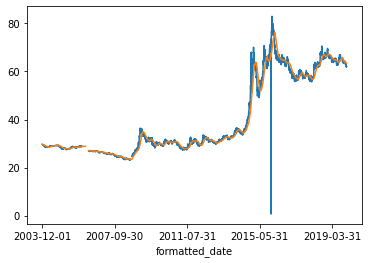

In [14]:
df['close'].plot()
df['SMA50'].plot()

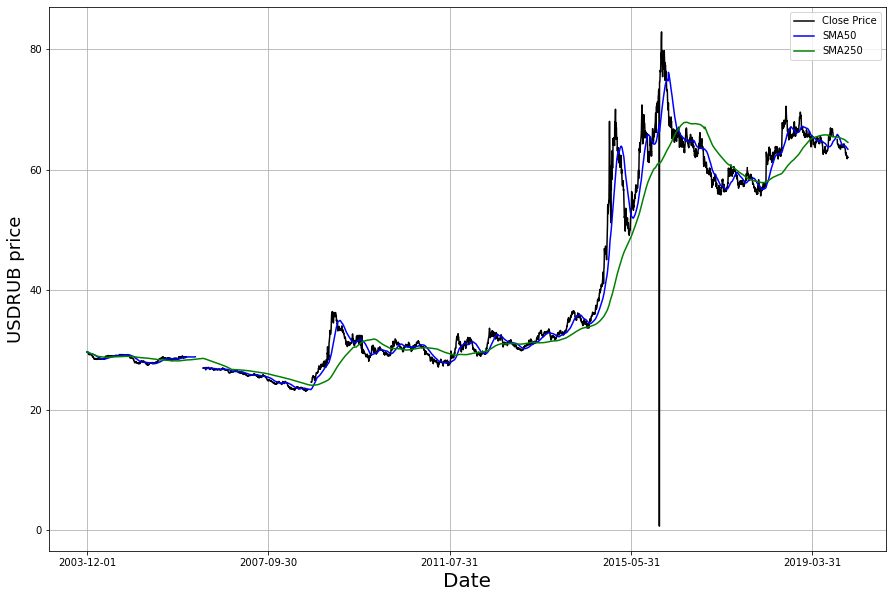

In [15]:
# lets plotting out MA and close price
plt.figure(figsize=(15,10))
df['close'].plot(color='k', label='Close Price')
df['SMA50'].plot(color='b', label='SMA50')
df['SMA250'].plot(color='g', label='SMA250')
plt.xlabel('Date', fontsize=20)
plt.ylabel('USDRUB price', fontsize=18)
plt.legend()
plt.grid()
plt.show();

In [16]:
# we create Exponential Moving Average or EMA, SMA doesn't enough good for prediction, 
#because it's lag windows/2 days, so for our SMA50 price delay ~25 days

In [17]:
def calculate_ema(prices, days, smoothing=2):
    """
    Calculate EMA for the given prices and days
    :param prices: Price which we want to apple EMA
    :type param: Pandas series
    :param days: days which we use for EMA
    :type days: int
    :param smoothing: Smoothing params, which can be change, by default=2, like it use many 'traders'
    :type smoothing: int
    Return EMA
    """
    ema = [sum(prices[:days]) / days]
    for price in prices[days-(days-1):]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema


In [18]:
df['EMA10'] = calculate_ema(df['close'], days=10)

In [19]:
len(df.close.values)

4198

In [20]:
len(df.index)

4198

In [21]:
df.head()

,high,low,open,close,adjclose,SMA50,SMA250,EMA10
formatted_date,,,,,,,,
2003-12-01,29.730000,29.690001,29.730000,29.700001,29.700001,29.700001,29.700001,29.572001
2003-12-02,29.700001,29.690001,29.690001,29.690001,29.690001,29.695001,29.695001,29.593455
2003-12-03,29.690001,29.690001,29.690001,29.690001,29.690001,29.693334,29.693334,29.611009
2003-12-04,29.680000,29.680000,29.680000,29.680000,29.680000,29.690001,29.690001,29.623553
2003-12-05,29.629999,29.629999,29.629999,29.620001,29.620001,29.676001,29.676001,29.622907


## Training and Prediction


---------------------


In [22]:
import time, math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:

# fill all miss values 
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')
   
price = df[['close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4198 entries, 2003-12-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4198 non-null   float64
dtypes: float64(1)
memory usage: 65.6+ KB


In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
price['close'] = scaler.fit_transform(price['close'].values.reshape(-1,1))

<ipython-input-24-35c4ee404647>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['close'] = scaler.fit_transform(price['close'].values.reshape(-1,1))


In [25]:
price.head()

,close
formatted_date,
2003-12-01,0.352670
2003-12-02,0.352549
2003-12-03,0.352549
2003-12-04,0.352427
2003-12-05,0.351697


In [26]:
def split_data(stock, lookback, test_size=0.2):
    """
    Split data
    :param stock: Our srock price
    :type stock : Pandas DataFrame
    :param lookback: sequence length (or window)
    :type lookback: int
    :param test_size: Size of test data
    :type test_size: Float
    
    Return list with splitting data
    """
    data_raw = stock.to_numpy() # convert to np.array
    data = []
    
    # create all possible sequences of length seq_len
    for ind in range(len(data_raw) - lookback):
        data.append(data_raw[ind: ind+lookback])
    
    data = np.array(data)
    test_set_size = int(np.round(test_size * data.shape[0])) # 20% to test data
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    
    
    return [x_train, y_train, x_test, y_test]

In [27]:
lookback = 20
x_train, y_train, x_test, y_test = split_data(price, lookback)
# Check shape for x_train
print('x_train_shape = ', x_train.shape)

x_train_shape =  (3342, 19, 1)


In [28]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [29]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [30]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [31]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)
    
    loss = criterion(y_train_pred, y_train_lstm)
    print('Epoch ', t, 'MSE: ', loss.item())
    hist[t] = loss.item()
    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))    

Epoch  0 MSE:  0.39552661776542664
Epoch  1 MSE:  0.23222868144512177
Epoch  2 MSE:  0.10752249509096146
Epoch  3 MSE:  0.021647868677973747
Epoch  4 MSE:  0.13725824654102325
Epoch  5 MSE:  0.05797288194298744
Epoch  6 MSE:  0.020982492715120316
Epoch  7 MSE:  0.027754753828048706
Epoch  8 MSE:  0.04122000187635422
Epoch  9 MSE:  0.04900376871228218
Epoch  10 MSE:  0.04992024600505829
Epoch  11 MSE:  0.04569600895047188
Epoch  12 MSE:  0.038603946566581726
Epoch  13 MSE:  0.03090844675898552
Epoch  14 MSE:  0.0246467012912035
Epoch  15 MSE:  0.021312130615115166
Epoch  16 MSE:  0.021400708705186844
Epoch  17 MSE:  0.024072520434856415
Epoch  18 MSE:  0.02738461270928383
Epoch  19 MSE:  0.029309026896953583
Epoch  20 MSE:  0.028906704857945442
Epoch  21 MSE:  0.026657292619347572
Epoch  22 MSE:  0.023821644484996796
Epoch  23 MSE:  0.021566683426499367
Epoch  24 MSE:  0.020471911877393723
Epoch  25 MSE:  0.020501991733908653
Epoch  26 MSE:  0.021233364939689636
Epoch  27 MSE:  0.022122

In [33]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

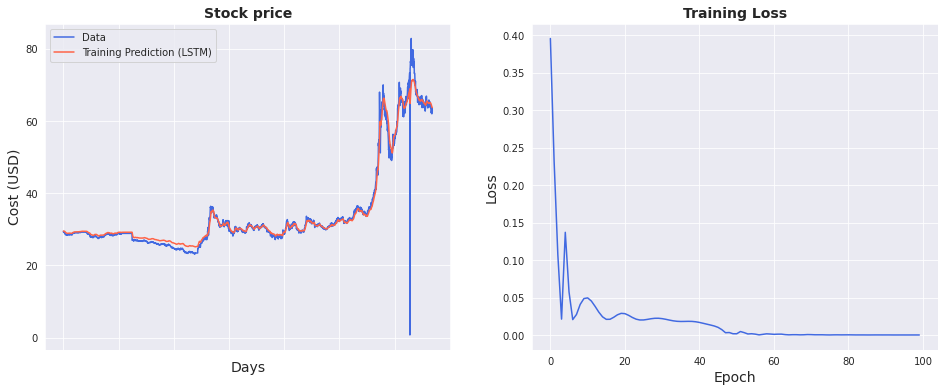

In [34]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [35]:
import math
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

Train Score: 1.83 RMSE
Test Score: 1.26 RMSE
